In [2]:
# Heart Attack Risk Prediction
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

%matplotlib inline


In [3]:
df = pd.read_csv("../datasets/Heart-Attack-Risk.csv")

df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [3]:
df.notna().sum()

Patient ID                         8763
Age                                8763
Sex                                8763
Cholesterol                        8763
Blood Pressure                     8763
Heart Rate                         8763
Diabetes                           8763
Family History                     8763
Smoking                            8763
Obesity                            8763
Alcohol Consumption                8763
Exercise Hours Per Week            8763
Diet                               8763
Previous Heart Problems            8763
Medication Use                     8763
Stress Level                       8763
Sedentary Hours Per Day            8763
Income                             8763
BMI                                8763
Triglycerides                      8763
Physical Activity Days Per Week    8763
Sleep Hours Per Day                8763
Country                            8763
Continent                          8763
Hemisphere                         8763


In [4]:
df.count()

Patient ID                         8763
Age                                8763
Sex                                8763
Cholesterol                        8763
Blood Pressure                     8763
Heart Rate                         8763
Diabetes                           8763
Family History                     8763
Smoking                            8763
Obesity                            8763
Alcohol Consumption                8763
Exercise Hours Per Week            8763
Diet                               8763
Previous Heart Problems            8763
Medication Use                     8763
Stress Level                       8763
Sedentary Hours Per Day            8763
Income                             8763
BMI                                8763
Triglycerides                      8763
Physical Activity Days Per Week    8763
Sleep Hours Per Day                8763
Country                            8763
Continent                          8763
Hemisphere                         8763


In [5]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='str')

In [6]:
df.tail

<bound method NDFrame.tail of      Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0       BMW7812   67    Male          208         158/88          72   
1       CZE1114   21    Male          389         165/93          98   
2       BNI9906   21  Female          324         174/99          72   
3       JLN3497   84    Male          383        163/100          73   
4       GFO8847   66    Male          318          91/88          93   
...         ...  ...     ...          ...            ...         ...   
8758    MSV9918   60    Male          121          94/76          61   
8759    QSV6764   28  Female          120        157/102          73   
8760    XKA5925   47    Male          250         161/75         105   
8761    EPE6801   36    Male          178         119/67          60   
8762    ZWN9666   25  Female          356         138/67          75   

      Diabetes  Family History  Smoking  Obesity  ...  \
0            0               0        1        0

In [7]:
df['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

In [8]:
df = df.dropna()
df[["Systolic_BP", "Diastolic_BP"]] = df["Blood Pressure"].str.split("/", expand=True).astype(int)
df = df.drop("Blood Pressure", axis=1)
df["Sex"] = df["Sex"].map({"Male": 0, "Female": 1})
X = df.drop(["Patient ID", "Heart Attack Risk", "Country","Diet", "Continent", "Hemisphere"], axis=1)
y = df["Heart Attack Risk"]


In [9]:
X.select_dtypes(exclude="number").columns.tolist()

[]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)
X_train.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Systolic_BP',
       'Diastolic_BP'],
      dtype='str')

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = {
    'C': st.loguniform(1e-4, 1e2).rvs(size=100),
    'l1_ratio': [0, 1],          
    'class_weight': ['balanced'],
    'solver': ['liblinear'],
    'max_iter': [200,700,600]
}

grid_search = GridSearchCV(
    LogisticRegression(),
    parameters,
    cv=12,                       
    scoring='recall'
)
grid_search.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegression()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': array([3.8725...39483842e-01]), 'class_weight': ['balanced'], 'l1_ratio': [0, 1], 'max_iter': [200, 700, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",12
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter cand

In [13]:
grid_search.predict_proba(X_test)

array([[0.48112853, 0.51887147],
       [0.51948877, 0.48051123],
       [0.45206835, 0.54793165],
       ...,
       [0.47196189, 0.52803811],
       [0.47101438, 0.52898562],
       [0.48782831, 0.51217169]], shape=(2629, 2))

In [14]:
y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)[:,1]

In [15]:
grid_search.score(X_test, y_test)

0.4709051724137931

In [16]:
from sklearn.metrics import classification_report

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.53      0.58      1701
           1       0.35      0.47      0.40       928

    accuracy                           0.51      2629
   macro avg       0.50      0.50      0.49      2629
weighted avg       0.54      0.51      0.52      2629



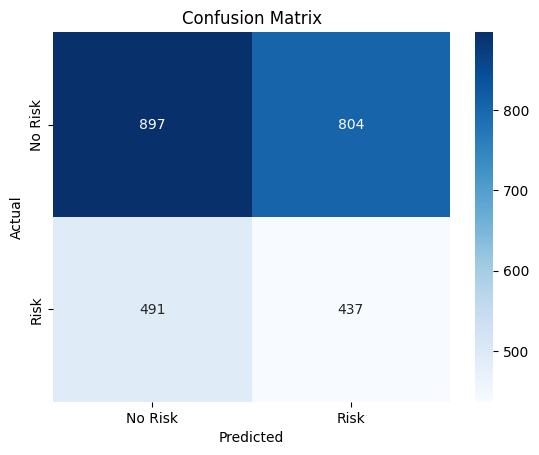

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Risk", "Risk"],
            yticklabels=["No Risk", "Risk"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

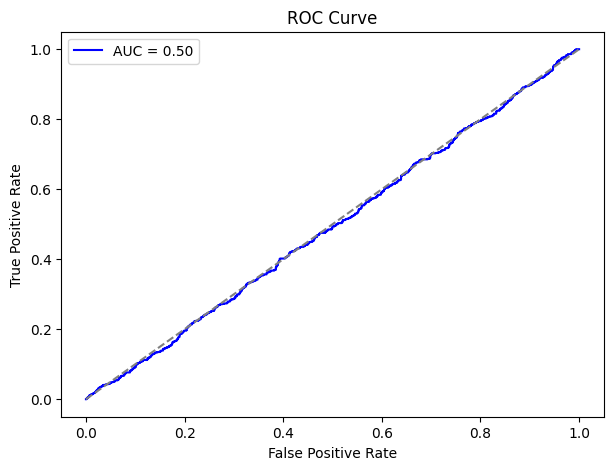

In [18]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

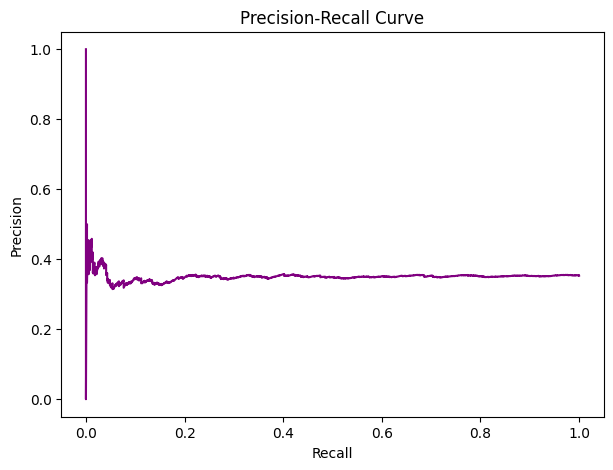

In [19]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, color="purple")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()